## Several Versions of MNIST Numbers with ANN

In [30]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings(action='once')

import keras

#Digits MNIST and Fashion MNIST work the same, pick one to work with
from keras.datasets import mnist
#from keras.datasets import fashion_mnist

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns
import random
from random import randint
import math
import numpy as np

from timeit import default_timer as timer
import datetime

In [31]:
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Making a copy before processing to display
x_train_drawing = x_train
y_train_drawing = y_train
x_test_drawing = x_test
y_test_drawing = y_test


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to one hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

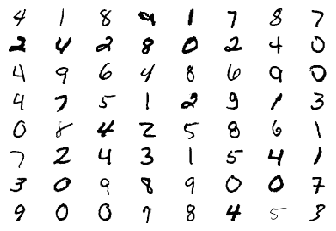

In [32]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [14]:
def create_denseLayer(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

In [ ]:
def writeSummary(afile, elapsed, epoc, layers, nodes, acc, loss):
    f = open(afile,'a+')
    now = datetime.datetime.now()
    output = str(now)+','+str(elapsed)+','+str(epoc)+','+str(layers)+','+str(nodes)+','+str(acc)+','+str(loss)+'\n'
    f.write(output)
    f.close()

In [35]:
def runModel(model, layers,nodes,batch_size=128, epochs=5,name='',output="annsummary.txt"):
    
    print("\n++++++++++++++++++++++++\n")
    
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    start = timer()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    end = timer()
    #print("Model elaped time: ",end - start) # Time in seconds
    elapsed = end-start
    print(f'Model elapsed time: {elapsed:.2f}')
    
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy '+ name)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    
    writeSummary(output,elapsed,epochs,layers, nodes,accuracy,loss)
    
    if accuracy > 0.92 :
        showBad(model,accuracy)
        
    

In [41]:

def showBad(model, accuracy, totsamp=35):

    # the presentation looks best with 7 columns so this will adjust the totsamp parameters to be a multiple of 7
    totsamp = math.floor(totsamp // 7)
    if totsamp < 1 : return
    print("enter totsam",totsamp)
    
    predictions = model.predict(x_test)

    preds = np.argmax(predictions, axis=1)
    trues = np.argmax(y_test, axis=1)

    badpred= []
    nbrincorrect = 0
    for i in range(len(preds)):
        if preds[i] != trues[i]:
            nbrincorrect = nbrincorrect +1
            badpred.append(i)


    if len(badpred) > totsamp:
        sample = random.choices(badpred, k=totsamp)
    else: sample = badpred

    if (totsamp % 7) != 0:
        totsamp = math.floor(totsamp //7)
        
    num_cols = 7
    if len(sample) < 7: num_cols = len(sample)
    if num_cols > 0:
        num_rows = totsamp // num_cols
    else:
        print("Incorrects not found")
        return
    
    print("Incorrects:", nbrincorrect," Rows: ",num_rows," Cols: ",num_cols)


    f, ax = plt.subplots(num_rows, num_cols, figsize=(12,9),
                         gridspec_kw={'wspace':0.2, 'hspace':0.5}, 
                         squeeze=True)
    count = 0
    for r in range(num_rows):
        for c in range(num_cols):
            image_index = count
            ax[r,c].axis("off")
            ax[r,c].imshow(x_test_drawing[sample[count]], cmap='Greys')
            titstr = "Pred: "+str(preds[sample[count]])+", Act: "+str(trues[sample[count]])
            ax[r,c].set_title(titstr)
            count = count + 1

    plt.show()
    plt.close()
    
    createCM(accuracy, trues, preds)

In [37]:
def createCM(accuracy, trues, preds):
    
    cm = metrics.confusion_matrix(trues,  preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'twilight');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15);




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model elaped time:  3.301474180000696


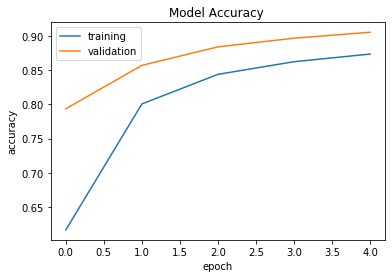


Test loss: 0.516
Test accuracy: 0.881
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  3.748577366999598


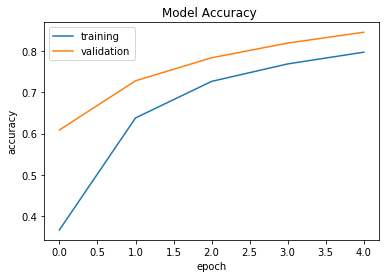


Test loss: 1.14
Test accuracy: 0.826
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  3.75057277399992


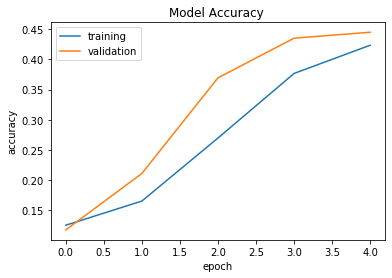


Test loss: 2.11
Test accuracy: 0.444
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  3.9567446780001774


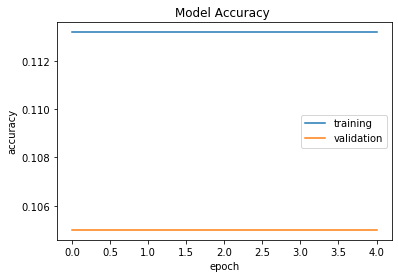


Test loss: 2.29
Test accuracy: 0.114


In [19]:
for layers in range(1, 5):
    model = create_denseLayer([32] * layers)
    runModel(model)


++++++++++++++++++++++++

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  13.838547641998957


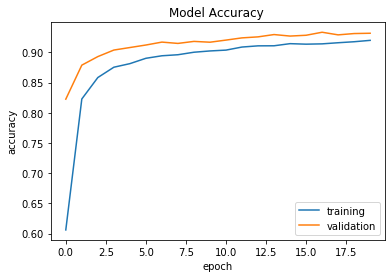


Test loss: 0.299
Test accuracy: 0.917

++++++++++++++++++++++++

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  14.627227303999462


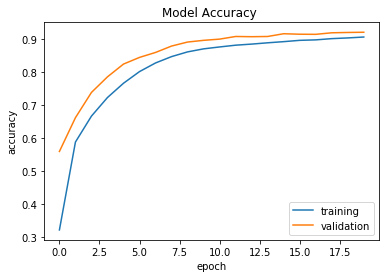


Test loss: 0.402
Test accuracy: 0.908

++++++++++++++++++++++++

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  14.874284715000613


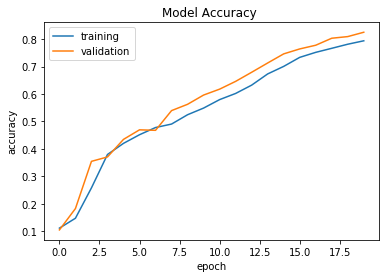


Test loss: 0.876
Test accuracy: 0.806

++++++++++++++++++++++++

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  14.38809132499955


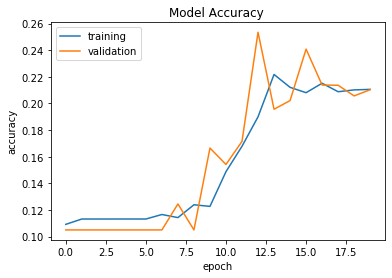


Test loss: 1.93
Test accuracy: 0.214


In [22]:
for layers in range(1, 5):
    model = create_denseLayer([32] * layers)
    runModel(model,epochs=20)


++++++++++++++++++++++++

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  8.004821986000024


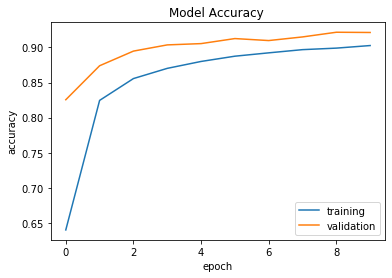


Test loss: 0.375
Test accuracy: 0.909

++++++++++++++++++++++++

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  15.62206696100111


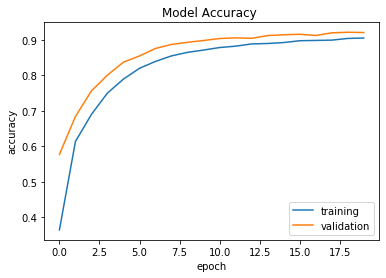


Test loss: 0.392
Test accuracy: 0.908

++++++++++++++++++++++++

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  23.76351761799924


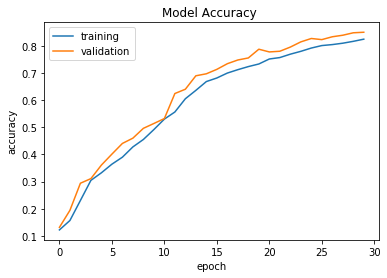


Test loss: 0.71
Test accuracy: 0.833

++++++++++++++++++++++++

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  33.140993561999494


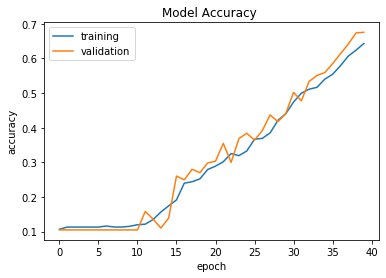


Test loss: 1.21
Test accuracy: 0.655


In [23]:
for layers in range(1, 5):
    model = create_denseLayer([32] * layers)
    runModel(model,epochs=layers*10)


++++++++++++++++++++++++

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  8.008544233000066


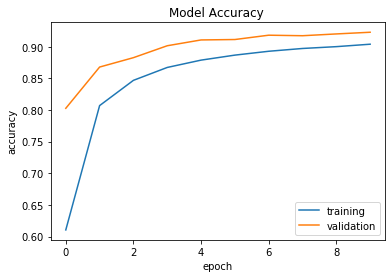


Test loss: 0.365
Test accuracy: 0.907

++++++++++++++++++++++++

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  11.236825037000017


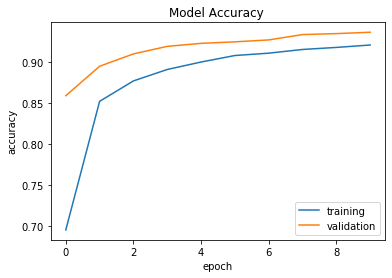


Test loss: 0.294
Test accuracy: 0.921

++++++++++++++++++++++++

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  12.901945232999424


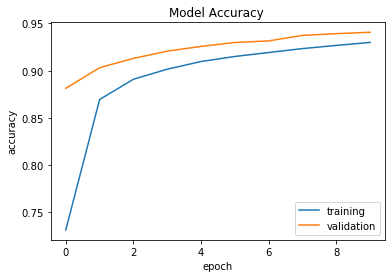


Test loss: 0.257
Test accuracy: 0.931

++++++++++++++++++++++++

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  15.956285929998558


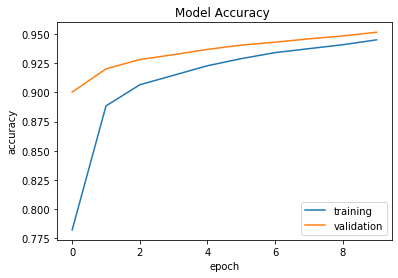


Test loss: 0.216
Test accuracy: 0.939

++++++++++++++++++++++++

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_66 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  22.982798418999664


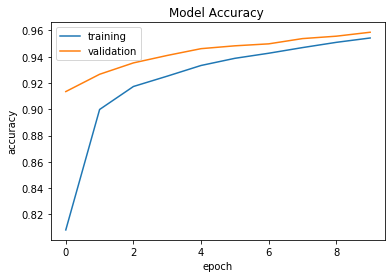


Test loss: 0.195
Test accuracy: 0.947

++++++++++++++++++++++++

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_68 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  36.57647589199951


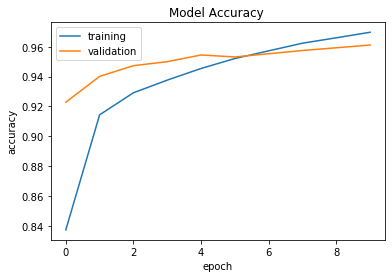


Test loss: 0.168
Test accuracy: 0.951

++++++++++++++++++++++++

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_70 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Model elaped time:  77.98517484900003


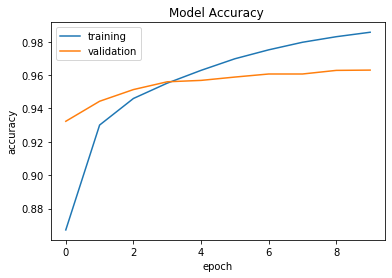


Test loss: 0.146
Test accuracy: 0.956


In [24]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_denseLayer([nodes])
    runModel(model, epochs=10)


++++++++++++++++++++++++

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_72 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 8.8


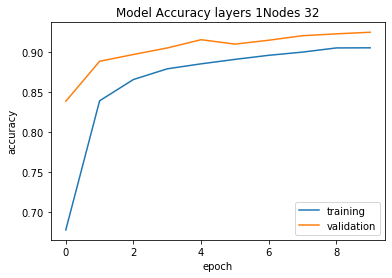


Test loss: 0.359
Test accuracy: 0.908

++++++++++++++++++++++++

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_74 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_75 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.9e+01


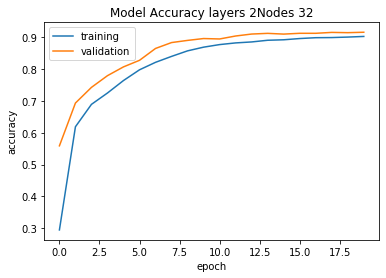


Test loss: 0.407
Test accuracy: 0.902

++++++++++++++++++++++++

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 2.5e+01


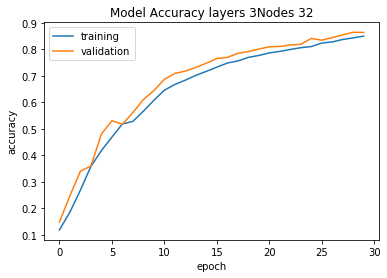


Test loss: 0.642
Test accuracy: 0.856

++++++++++++++++++++++++

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_81 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_82 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_83 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_84 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 4e+01


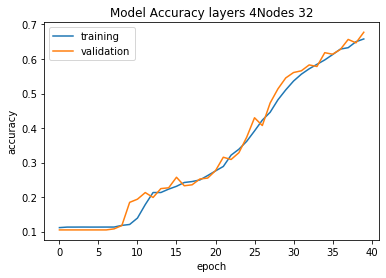


Test loss: 1.13
Test accuracy: 0.666

++++++++++++++++++++++++

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trai

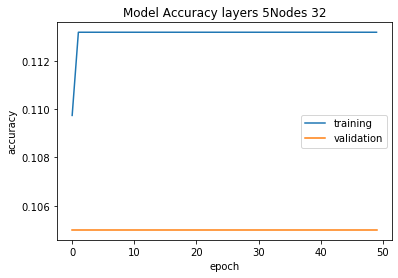


Test loss: 2.3
Test accuracy: 0.114

++++++++++++++++++++++++

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_92 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.3e+01


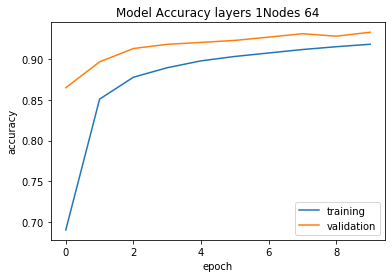


Test loss: 0.298
Test accuracy: 0.92

++++++++++++++++++++++++

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_94 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_95 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 2.1e+01


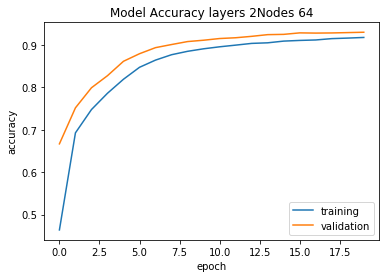


Test loss: 0.311
Test accuracy: 0.922

++++++++++++++++++++++++

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_98 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_99 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 3.2e+01


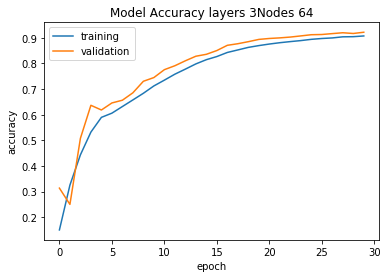


Test loss: 0.39
Test accuracy: 0.908

++++++++++++++++++++++++

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_101 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_102 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_104 (Dense)            (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 4.5e+01


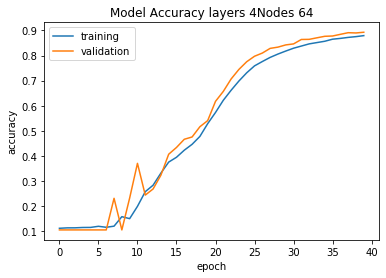


Test loss: 0.536
Test accuracy: 0.878

++++++++++++++++++++++++

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_106 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_107 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_108 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_109 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_110 (Dense)            (None, 10)                650       
Total params: 67,530
Trainable params: 67,530
Non-tra

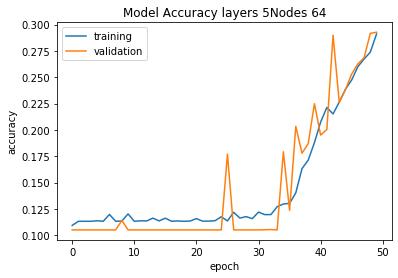


Test loss: 1.8
Test accuracy: 0.284

++++++++++++++++++++++++

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_112 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.3e+01


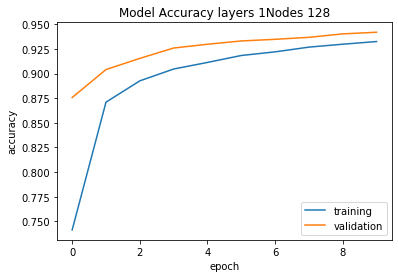


Test loss: 0.246
Test accuracy: 0.933

++++++++++++++++++++++++

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_114 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_115 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 2.7e+01


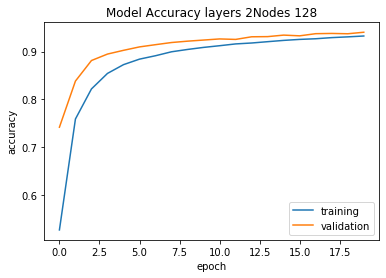


Test loss: 0.257
Test accuracy: 0.932

++++++++++++++++++++++++

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_117 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_118 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_119 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 4.4e+01


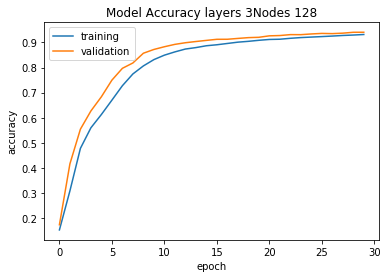


Test loss: 0.264
Test accuracy: 0.927

++++++++++++++++++++++++

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_121 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_122 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_123 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_124 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 6.2e+01


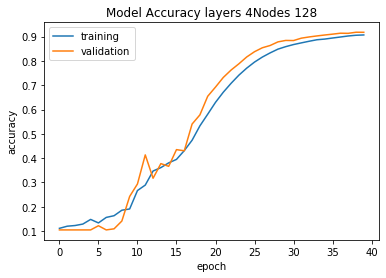


Test loss: 0.4
Test accuracy: 0.906

++++++++++++++++++++++++

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_126 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_127 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_128 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_129 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_130 (Dense)            (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-tra

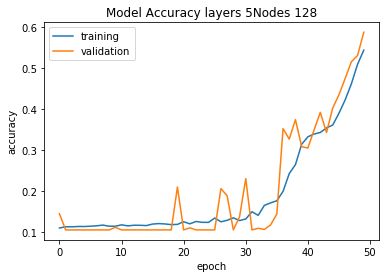


Test loss: 1.33
Test accuracy: 0.568

++++++++++++++++++++++++

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_132 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.9e+01


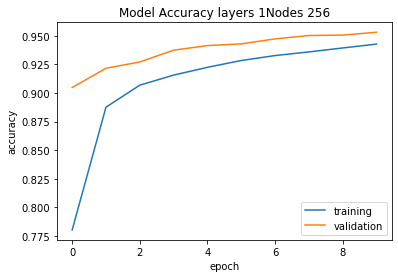


Test loss: 0.22
Test accuracy: 0.938

++++++++++++++++++++++++

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_134 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_135 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 3.9e+01


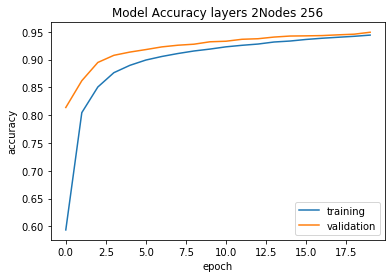


Test loss: 0.22
Test accuracy: 0.938

++++++++++++++++++++++++

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_137 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_138 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_139 (Dense)            (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 7e+01


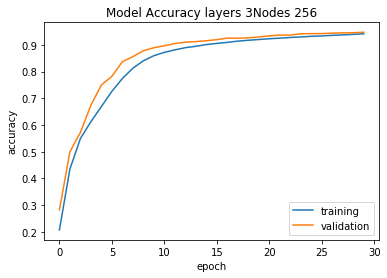


Test loss: 0.238
Test accuracy: 0.933

++++++++++++++++++++++++

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_141 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_142 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_143 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_144 (Dense)            (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1e+02


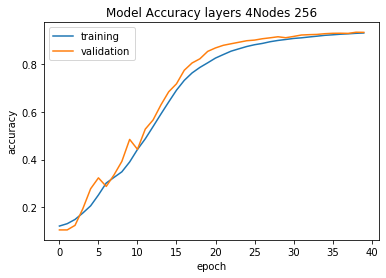


Test loss: 0.302
Test accuracy: 0.922

++++++++++++++++++++++++

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_146 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_147 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_148 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_149 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_150 (Dense)            (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-t

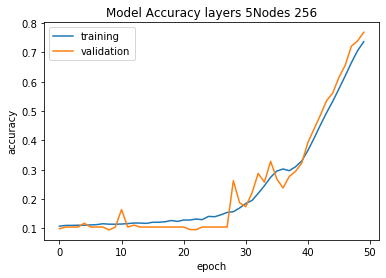


Test loss: 0.958
Test accuracy: 0.754

++++++++++++++++++++++++

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_152 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 3.2e+01


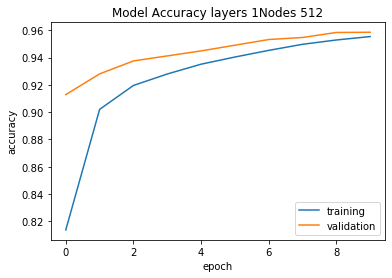


Test loss: 0.189
Test accuracy: 0.945

++++++++++++++++++++++++

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_154 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_155 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 8.2e+01


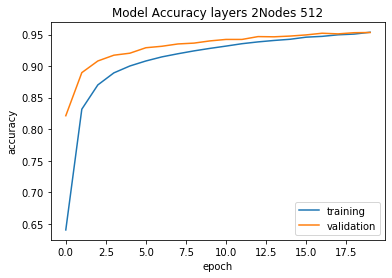


Test loss: 0.2
Test accuracy: 0.941

++++++++++++++++++++++++

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_157 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_158 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_159 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.9e+02


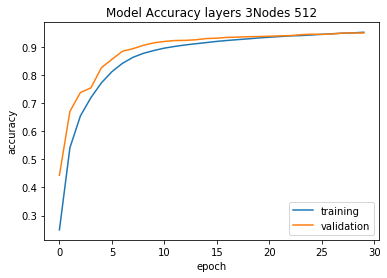


Test loss: 0.217
Test accuracy: 0.937

++++++++++++++++++++++++

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_161 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_162 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_163 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_164 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 3.7e+02


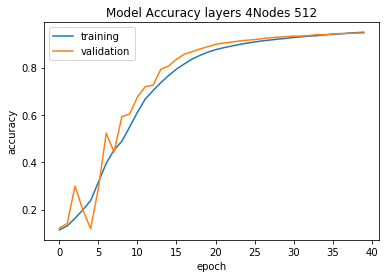


Test loss: 0.241
Test accuracy: 0.936

++++++++++++++++++++++++

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_166 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_167 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_168 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_169 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_170 (Dense)            (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
N

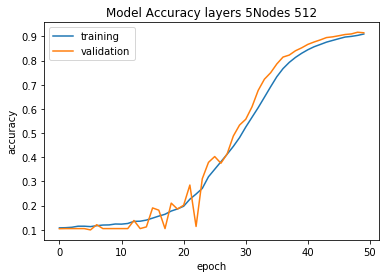


Test loss: 0.432
Test accuracy: 0.897

++++++++++++++++++++++++

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_172 (Dense)            (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 5.7e+01


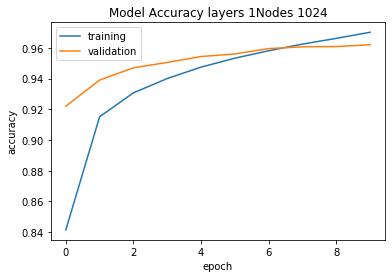


Test loss: 0.167
Test accuracy: 0.951

++++++++++++++++++++++++

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_174 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_175 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 2.4e+02


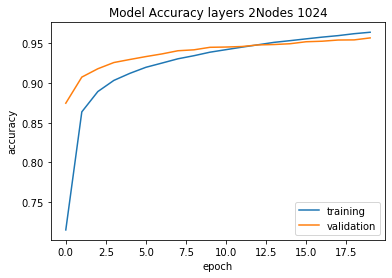


Test loss: 0.186
Test accuracy: 0.946

++++++++++++++++++++++++

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_177 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_178 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_179 (Dense)            (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 4.7e+02


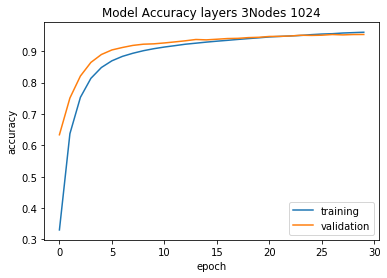


Test loss: 0.201
Test accuracy: 0.94

++++++++++++++++++++++++

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_181 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_182 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_183 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_184 (Dense)            (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1e+03


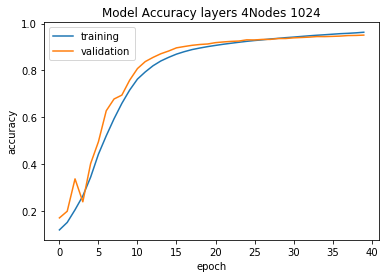


Test loss: 0.224
Test accuracy: 0.937

++++++++++++++++++++++++

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_186 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_187 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_188 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_189 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_190 (Dense)            (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
N

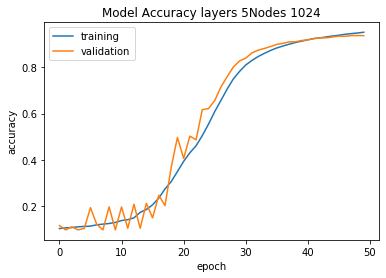


Test loss: 0.306
Test accuracy: 0.924

++++++++++++++++++++++++

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_192 (Dense)            (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 8e+01


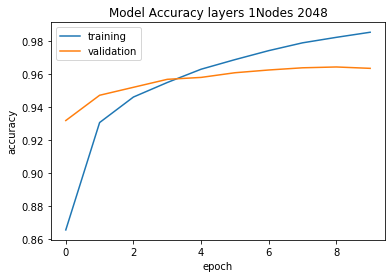


Test loss: 0.146
Test accuracy: 0.957

++++++++++++++++++++++++

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_194 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_195 (Dense)            (None, 10)                20490     
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 5.7e+02


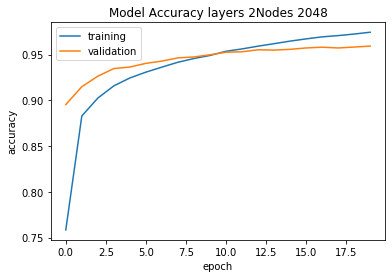


Test loss: 0.173
Test accuracy: 0.949

++++++++++++++++++++++++

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_197 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_198 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_199 (Dense)            (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1.5e+03


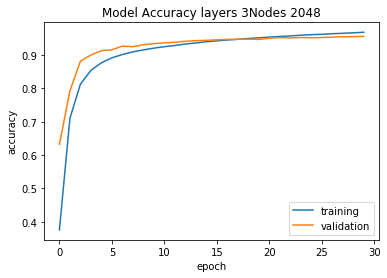


Test loss: 0.187
Test accuracy: 0.943

++++++++++++++++++++++++

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_201 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_202 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_203 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_204 (Dense)            (None, 10)                20490     
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 2.6e+03


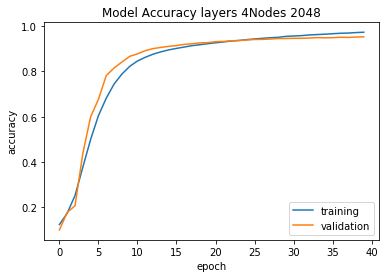


Test loss: 0.204
Test accuracy: 0.942

++++++++++++++++++++++++

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_206 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_207 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_208 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_209 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_210 (Dense)            (None, 10)                20490     
Total params: 18,413,578
Trainable params: 18,413,578

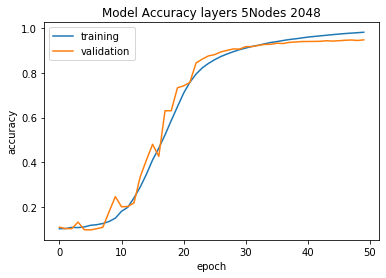


Test loss: 0.265
Test accuracy: 0.935


In [26]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    for layers in [1,2,3,4,5]:
        model = create_denseLayer([nodes]* layers)
        nme = "Layers "+str(layers)+ " Nodes "+ str(nodes)
        runModel(model, epochs=10*layers,name=nme)


++++++++++++++++++++++++

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_216 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 24.37


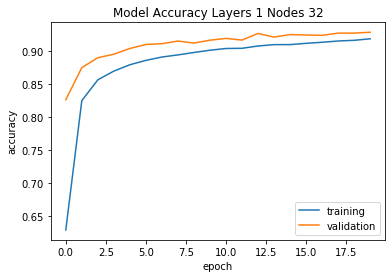


Test loss: 0.297
Test accuracy: 0.919

++++++++++++++++++++++++

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_218 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_219 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 48.97


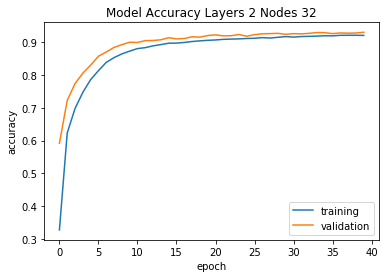


Test loss: 0.299
Test accuracy: 0.918

++++++++++++++++++++++++

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_221 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_222 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_223 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 77.83


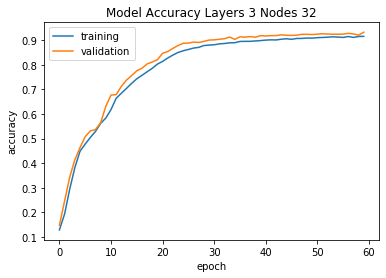


Test loss: 0.333
Test accuracy: 0.915

++++++++++++++++++++++++

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_225 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_226 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_227 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_228 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 106.72


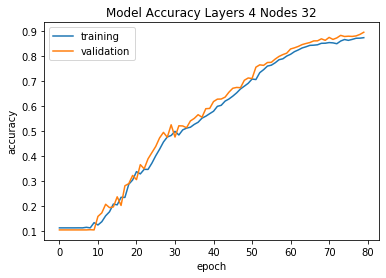


Test loss: 0.512
Test accuracy: 0.877

++++++++++++++++++++++++

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_230 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_231 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_232 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_233 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_234 (Dense)            (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-tra

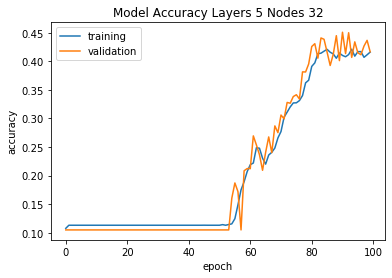


Test loss: 1.38
Test accuracy: 0.417

++++++++++++++++++++++++

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_236 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 27.31


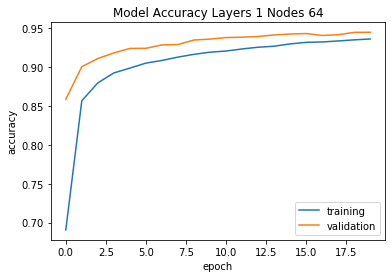


Test loss: 0.24
Test accuracy: 0.934
Incorrects: 659  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_238 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_239 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 63.37


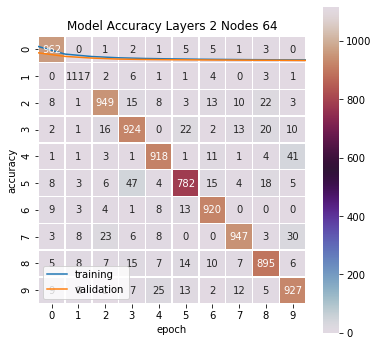


Test loss: 0.221
Test accuracy: 0.94
Incorrects: 600  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_241 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_242 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_243 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 92.82


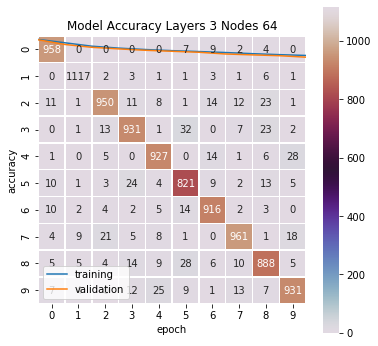


Test loss: 0.247
Test accuracy: 0.932
Incorrects: 679  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_245 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_246 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_247 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_248 (Dense)            (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 138.56


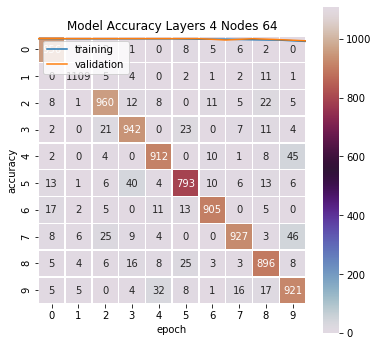


Test loss: 0.286
Test accuracy: 0.924
Incorrects: 757  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_250 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_251 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_252 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_253 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_254 (Dense)            (None, 10)                650       
Total params: 67,530
Trainable params: 67,530
Non-trainable params: 0
______________________

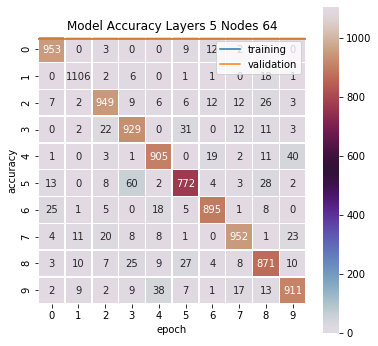


Test loss: 0.697
Test accuracy: 0.827

++++++++++++++++++++++++

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_255 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_256 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 37.08


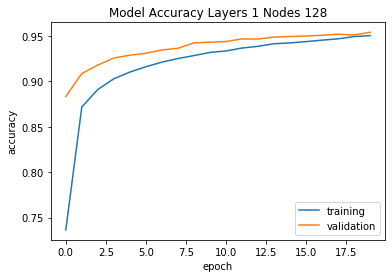


Test loss: 0.195
Test accuracy: 0.946
Incorrects: 541  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_258 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_259 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 78.87


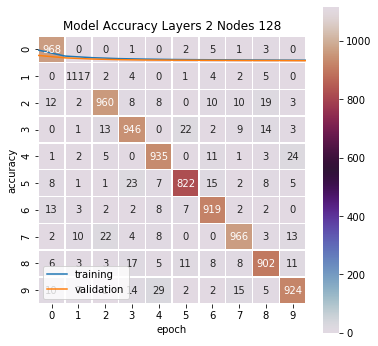


Test loss: 0.186
Test accuracy: 0.947
Incorrects: 530  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_261 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_262 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_263 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 567.19


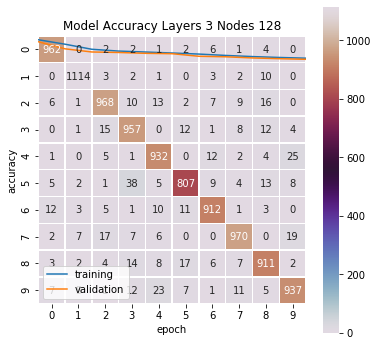


Test loss: 0.185
Test accuracy: 0.945
Incorrects: 548  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_265 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_266 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_267 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_268 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 978.76


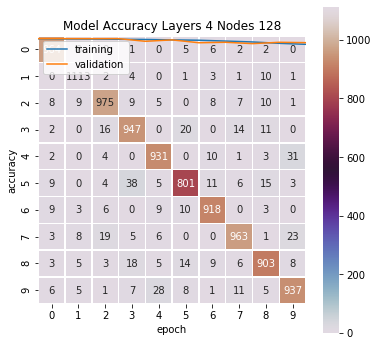


Test loss: 0.242
Test accuracy: 0.932
Incorrects: 676  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_270 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_271 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_272 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_273 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_274 (Dense)            (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
____________________

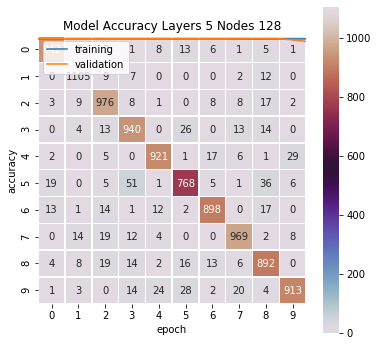


Test loss: 0.94
Test accuracy: 0.742

++++++++++++++++++++++++

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_276 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 49.99


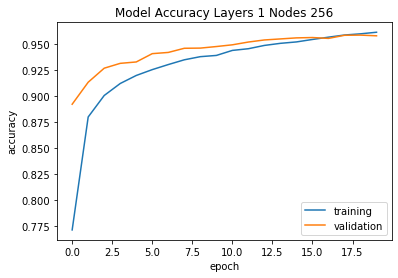


Test loss: 0.174
Test accuracy: 0.95
Incorrects: 501  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_278 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_279 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 120.57


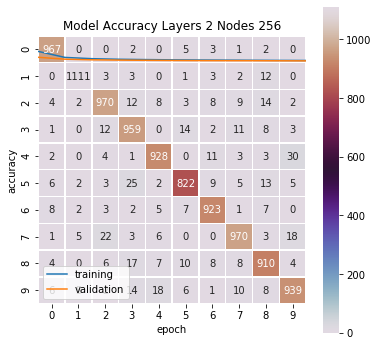


Test loss: 0.169
Test accuracy: 0.95
Incorrects: 503  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_281 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_282 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_283 (Dense)            (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 221.55


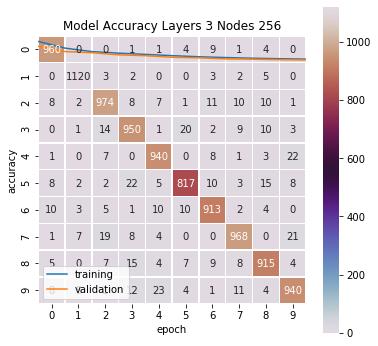


Test loss: 0.162
Test accuracy: 0.953
Incorrects: 473  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_284 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_285 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_286 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_287 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_288 (Dense)            (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 310.37


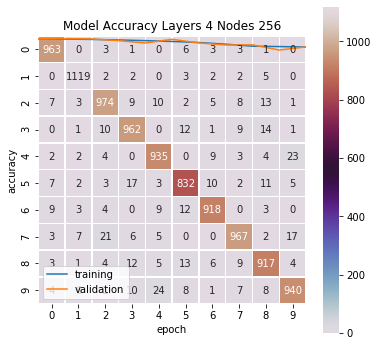


Test loss: 0.198
Test accuracy: 0.946
Incorrects: 542  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_290 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_291 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_292 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_293 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_294 (Dense)            (None, 10)                2570      
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
____________________

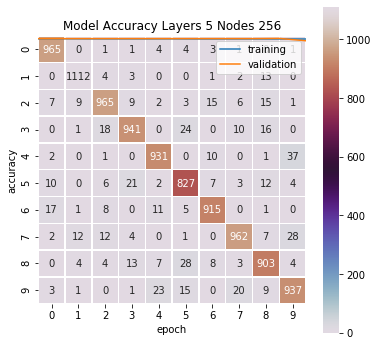


Test loss: 0.26
Test accuracy: 0.934
Incorrects: 663  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_296 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 66.52


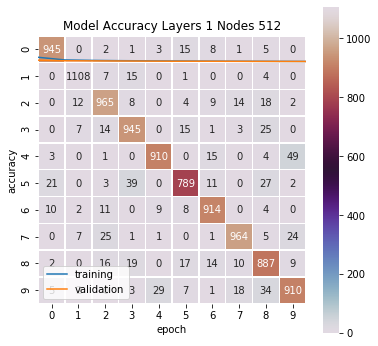


Test loss: 0.152
Test accuracy: 0.954
Incorrects: 461  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_298 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_299 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 197.28


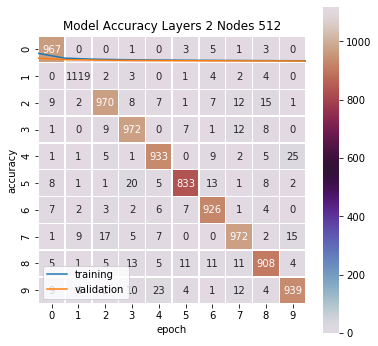


Test loss: 0.165
Test accuracy: 0.95
Incorrects: 501  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_301 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_302 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_303 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 622.40


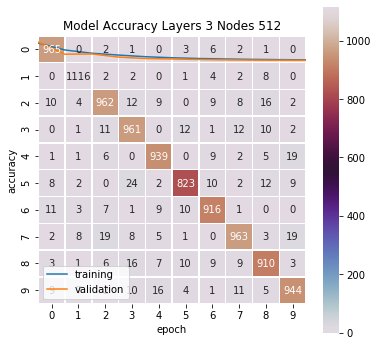


Test loss: 0.166
Test accuracy: 0.949
Incorrects: 511  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_305 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_306 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_307 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_308 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 693.21


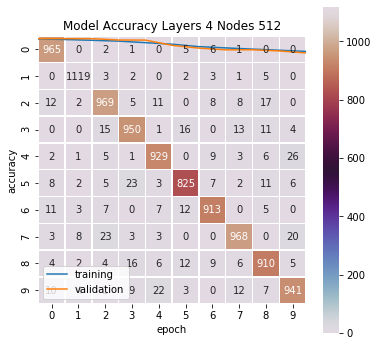


Test loss: 0.19
Test accuracy: 0.948
Incorrects: 518  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_310 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_311 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_312 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_313 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_314 (Dense)            (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
________________

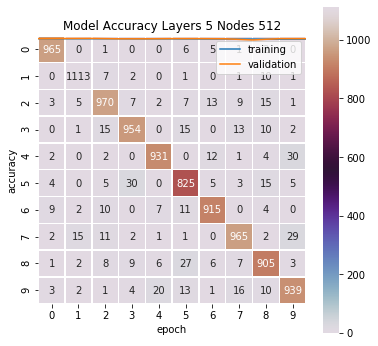


Test loss: 0.225
Test accuracy: 0.944
Incorrects: 564  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_316 (Dense)            (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 101.67


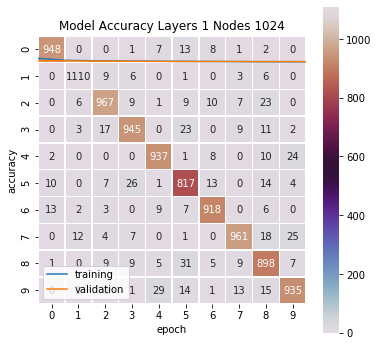


Test loss: 0.138
Test accuracy: 0.958
Incorrects: 424  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_318 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_319 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 431.75


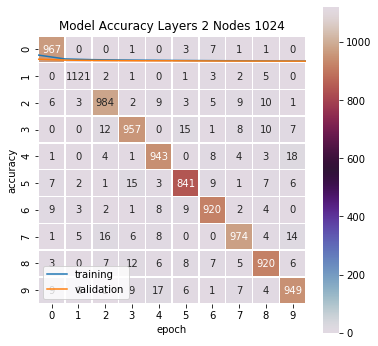


Test loss: 0.159
Test accuracy: 0.95
Incorrects: 496  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_321 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_322 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_323 (Dense)            (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________
Model elapsed time: 1138.32


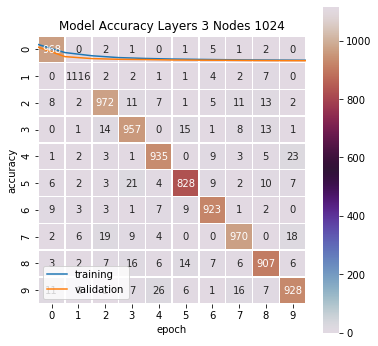


Test loss: 0.168
Test accuracy: 0.949
Incorrects: 510  Rows:  0  Cols:  5


<Figure size 864x648 with 0 Axes>


++++++++++++++++++++++++

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_325 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_326 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_327 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_328 (Dense)            (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    for layers in [1,2,3,4,5]:
        model = create_denseLayer([nodes]* layers)
        nme = "Layers "+str(layers)+ " Nodes "+ str(nodes)
        runModel(model, layers, nodes,epochs=20*layers,name=nme)